In [17]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [18]:
df_Ind = df[df['job_country'] == 'India'].copy()
df_Ind['job_posted_month'] = df_Ind['job_posted_date'].dt.strftime('%B')
df_ind_pivot = df_Ind.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_ind_pivot.reset_index(inplace=True)
df_ind_pivot['month_no'] = pd.to_datetime(df_ind_pivot['job_posted_month'],format='%B').dt.month
df_ind_pivot.sort_values('month_no', inplace = True)
df_ind_pivot.set_index('job_posted_month', inplace=True)
df_ind_pivot.drop(columns='month_no', inplace=True)
df_ind_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


<Axes: xlabel='job_posted_month'>

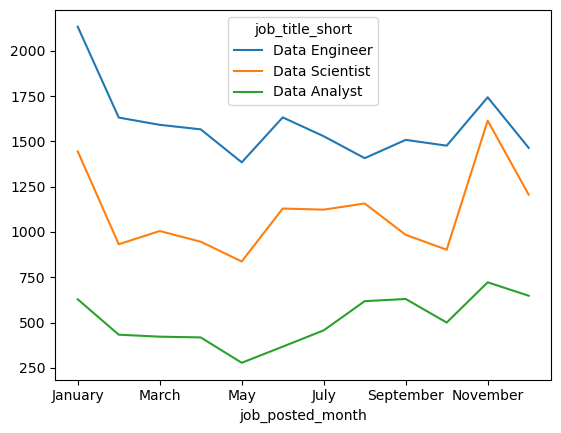

In [19]:
top_3 = df_Ind['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()
df_ind_pivot[top_3].plot(kind='line')